In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from bias_variance_analysis import bias_variance_analysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [3]:
# Read the preprocessed data
df = pd.read_csv('../dataset/body_level_classification_train_preprocessed.csv')

X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [5]:
# Fit the random forest model
model_architecture = DecisionTreeClassifier()
model = model_architecture.fit(X_train, y_train)

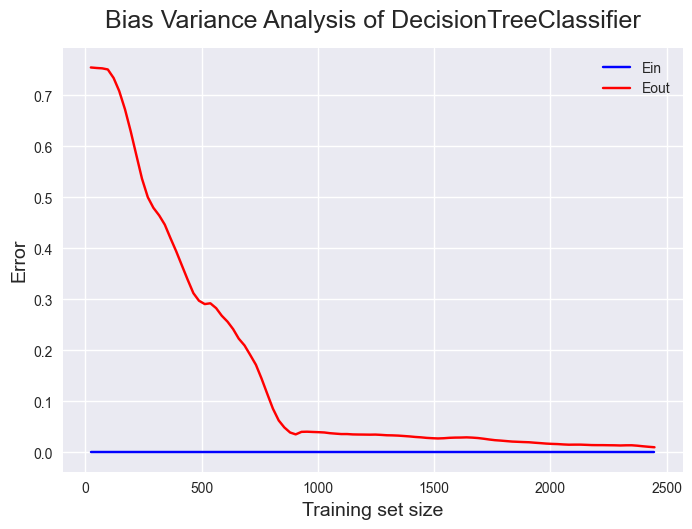

In [6]:
bias_variance_analysis(model_architecture, X, y)

In [7]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='weighted', multi_class='ovr')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Accuracy: 0.9852941176470589
Precision: 0.9853698863112075
Recall: 0.9852941176470589
F1-score: 0.9852724986581317
AUC-ROC: 0.9901960784313727


In [8]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       136
           2       0.97      0.99      0.98       136
           3       0.98      0.96      0.97       136
           4       0.99      0.99      0.99       136

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544

